In [1]:
import numpy as np

In [2]:
V_150mM = (1.45 / 2) ** 2 * np.pi * 0.53  # cm^3
N_0 = 150 * 10**-3 * V_150mM  # mmol
D = 1.5 * 10**-5  # cm^2/s
d = 1.76  # cm
t = 18 * 60 * 60  # s

In [3]:
C_0 = N_0 / (4 * np.pi * d * D * t) * 10**3
lambda_ = 10 * np.sqrt(2 * D * t)

print(C_0, lambda_)

6.106666710507856 13.942740046346703


In [9]:
import oed
import numpy as np
import plotly.graph_objects as go

#  定数とパラメータを定義
c_0 = 1
lambda_ = 1.61
x_peak = 4.5
y_peak = 0

#  指定された範囲内でxとyの座標を生成
x = np.linspace(-5, 5, num=100)
y = np.linspace(-5, 5, num=100)
x, y = np.meshgrid(x, y)

#  与えられた式に基づいてz値を計算
z = oed.c_gauss(c_0, lambda_, x, y, x_peak, y_peak)

# 3D表面プロットを作成
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale="rainbow")])

fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=False, showgrid=False),
        yaxis=dict(showbackground=False, showgrid=False),
        zaxis=dict(showbackground=False, showgrid=False),
        xaxis_title="X /cm",
        yaxis_title="Y /cm",
        zaxis_title="C /mM",
    )
)

#  プロットを表示
fig.show()

In [3]:
import oed
import numpy as np
import plotly.graph_objects as go

#  定数とパラメータを定義
c_0 = 1
lambda_ = 1.61
x_peak = 4.5
y_peak = 0

#  指定された範囲内でxとyの座標を生成
x = np.linspace(-5, 5, num=100)
y = np.linspace(-5, 5, num=100)
x, y = np.meshgrid(x, y)

#  与えられた式に基づいてz値を計算
z = oed.c_gauss(c_0, lambda_, x, y, x_peak, y_peak)

# z値の傾き（微分）を計算
dzdx, dzdy = np.gradient(z, edge_order=2)

# 傾きを結合してカラースケールの値として使用するための単一の配列を作成
color_scale_values = np.sqrt(dzdx**2 + dzdy**2)

# Calculate the norm of each vector in the array
norms = np.linalg.norm(np.array([dzdx, dzdy]), axis=0)

# Normalize the color_scale_values by dividing by the maximum norm
color_scale_values = color_scale_values / np.max(norms)

# 傾きの大きさに基づいてカラースケールを適用した3D表面プロットを作成
fig = go.Figure(
    data=[
        go.Surface(
            x=x,
            y=y,
            z=z,
            surfacecolor=color_scale_values,
            colorscale="rainbow",
            colorbar=dict(title="Normalized Gradient Magnitude"),
        )
    ]
)

#  レイアウトを更新
fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=False, showgrid=False),
        yaxis=dict(showbackground=False, showgrid=False),
        zaxis=dict(showbackground=False, showgrid=False),
        xaxis_title="X /cm",
        yaxis_title="Y /cm",
        zaxis_title="C /mM",
    )
)


#  プロットを表示
fig.show()

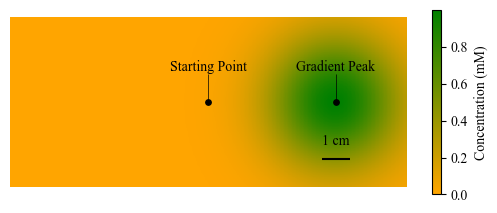

In [4]:
import oed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#  定数とパラメータを定義
c_0 = 1
lambda_ = 1.61
x_peak = 4.5
y_peak = 0

#  指定された範囲内でxとyの座標を生成
x = np.linspace(-7, 7, num=100)
y = np.linspace(-3, 3, num=100)
x, y = np.meshgrid(x, y)

#  与えられた式に基づいてz値を計算
z = oed.c_gauss(c_0, lambda_, x, y, x_peak, y_peak)

#  カスタムカラーマップを作成
cmap = LinearSegmentedColormap.from_list("custom", ["orange", "green"], N=256)

#  フォントを Times New Roman  に設定
plt.rcParams["font.family"] = "Times New Roman"

#  ヒートマップを表示
fig, ax = plt.subplots()
im = ax.imshow(z, cmap=cmap, origin="lower", extent=[-7, 7, -3, 3])

#  スタートとゴールの表示
starting_point = [0, 0]
peak = [x_peak, y_peak]

ax.scatter(*starting_point, s=15, color="black")
ax.scatter(*peak, s=15, color="black")

y_max = 1
ax.vlines(
    starting_point[0],
    starting_point[1],
    y_max,
    color="black",
    linestyle="-",
    linewidth=0.5,
)
ax.vlines(peak[0], peak[1], y_max, color="black", linestyle="-", linewidth=0.5)

ax.text(starting_point[0], y_max + 0.1, "Starting Point", horizontalalignment="center")
ax.text(peak[0], y_max + 0.1, "Gradient Peak", horizontalalignment="center")

# 軸メモリや枠を非表示にする
ax.axis("off")
ax.autoscale()
ax.set_aspect("equal")

#  基準の大きさを表示
ax.text(4.5, -1.5, "1 cm", horizontalalignment="center")
ax.hlines(-2, 4, 5, color="black", linestyle="-", linewidth=1.5)

#   カラーバーを追加
plt.colorbar(im, ax=ax, label="Concentration (mM)", shrink=0.5)

# plt.title("Concentration Heatmap")
plt.savefig("./濃度.png", dpi=300)
plt.show()